In [54]:
import pylab

In [58]:
from pycbc.waveform import get_fd_waveform
import numpy as np
import pycbc.conversions as conversions
import lal

def IMRPhenomdipole(B=0.0, **kwds):
    if 'approximant' in kwds:
        kwds.pop("approximant")
    hp, hc = get_fd_waveform(approximant="IMRPhenomXPHM", **kwds)

    eta = conversions.eta_from_mass1_mass2(kwds['mass1'],kwds['mass2'])
    M_chirp = conversions.mchirp_from_mass1_mass2(kwds['mass1'],kwds['mass2'])
    M = conversions.mtotal_from_mass1_mass2(kwds['mass1'],kwds['mass2'])

    
    kmin = int(kwds['f_lower']/kwds['delta_f'])
    fsampling = hp.sample_frequencies[kmin:]

    beta = -3/224*eta**(2/5)*B
    dipole = np.exp(1j*beta*(np.pi*M_chirp*fsampling*lal.MTSUN_SI)**(-7/3))
    #dipole[(fsampling>fISCO)] = np.ones_like(fsampling[(fsampling>fISCO)])
    
    hp[kmin:], hc[kmin:] = hp[kmin:]*dipole, hc[kmin:]*dipole

    #derive_B = (-1j) * (3/(224 * eta)) * (pi*M*fsampling*s_g)**(-7/3) * hcd

    return hp,hc

In [59]:
# Now we can add this waveform to pycbc directly. This will make the waveform 
# accessible from get_fd_waveform and higher level functions.
from pycbc.waveform import add_custom_waveform

# To protect against overriding an existing waveform, you'll get an error if you run
# this function twice, to override this, you can set force=True.
# add_custom_waveform('my_waveform', my_waveform, 'frequency')
add_custom_waveform('IMRPhenomdipole', IMRPhenomdipole, 'frequency', force=True)

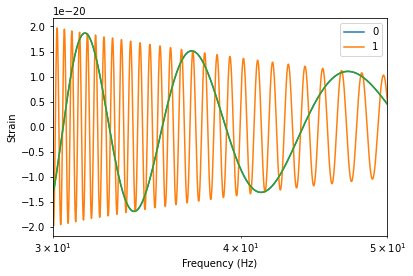

In [76]:
for B in [0,1]:
    hp, hc = get_fd_waveform(approximant="IMRPhenomdipole", B=B,
                         mass1=30, mass2=30, 
                         f_lower=30, delta_f=1.0/64)
    pylab.plot(hp.sample_frequencies, hp.real(),label=str(B))

    
hpdef, hcdef = get_fd_waveform(approximant="IMRPhenomXPHM",
                         mass1=30, mass2=30, 
                         f_lower=30, delta_f=1.0/64)
pylab.plot(hpdef.sample_frequencies,hpdef.real())
pylab.xscale('log')
pylab.xlim(30, 50)
pylab.xlabel('Frequency (Hz)')
pylab.ylabel('Strain')
pylab.legend()